<a href="https://colab.research.google.com/github/aidaaminian/snn-self-driving/blob/main/bproj_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install and Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!unzip "/content/drive/MyDrive/bproj-dataset/traffic-sign-yolo.zip" -d "/content/home"

Archive:  /content/drive/MyDrive/bproj-dataset/traffic-sign-yolo.zip
replace /content/home/traffic-sign-yolo/00000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
!pip install nengo
!pip install nengo-dl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%matplotlib inline
import nengo
import nengo_dl
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

### Load Data

In [4]:
IMG_HEIGHT = 240
IMG_WIDTH = 240

In [5]:
dir_path = '/content/home/'

In [7]:
import cv2
import glob
image_list = []
for filename in glob.glob(dir_path + 'traffic-sign-yolo/*.jpg'):
    image = cv2.imread (filename)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.resize(image,(240,240))
    image_list.append (image)

### Data Preprocessing

In [8]:
np.array(image_list).shape

(741, 240, 240, 3)

In [9]:
image_list

[array([[[221, 220, 206],
         [224, 222, 210],
         [220, 218, 207],
         ...,
         [222, 218, 210],
         [219, 218, 212],
         [214, 218, 211]],
 
        [[ 62,  56,  29],
         [ 77,  73,  76],
         [ 64,  54,  41],
         ...,
         [ 49,  40,  30],
         [ 47,  35,  30],
         [ 21,  31,  21]],
 
        [[ 58,  50,  25],
         [ 44,  48,  48],
         [ 80,  65,  47],
         ...,
         [ 61,  47,  35],
         [ 40,  32,  39],
         [ 20,  26,  18]],
 
        ...,
 
        [[ 67,  71,  44],
         [ 76,  80,  83],
         [ 74,  79,  81],
         ...,
         [ 43,  51,  33],
         [ 46,  47,  31],
         [ 38,  55,  42]],
 
        [[ 74,  80,  54],
         [ 78,  85,  91],
         [ 81,  88,  92],
         ...,
         [ 44,  56,  37],
         [ 53,  57,  40],
         [ 39,  57,  44]],
 
        [[ 87,  94,  70],
         [ 88,  97, 106],
         [ 90,  97, 104],
         ...,
         [ 43,  53,  32],
  

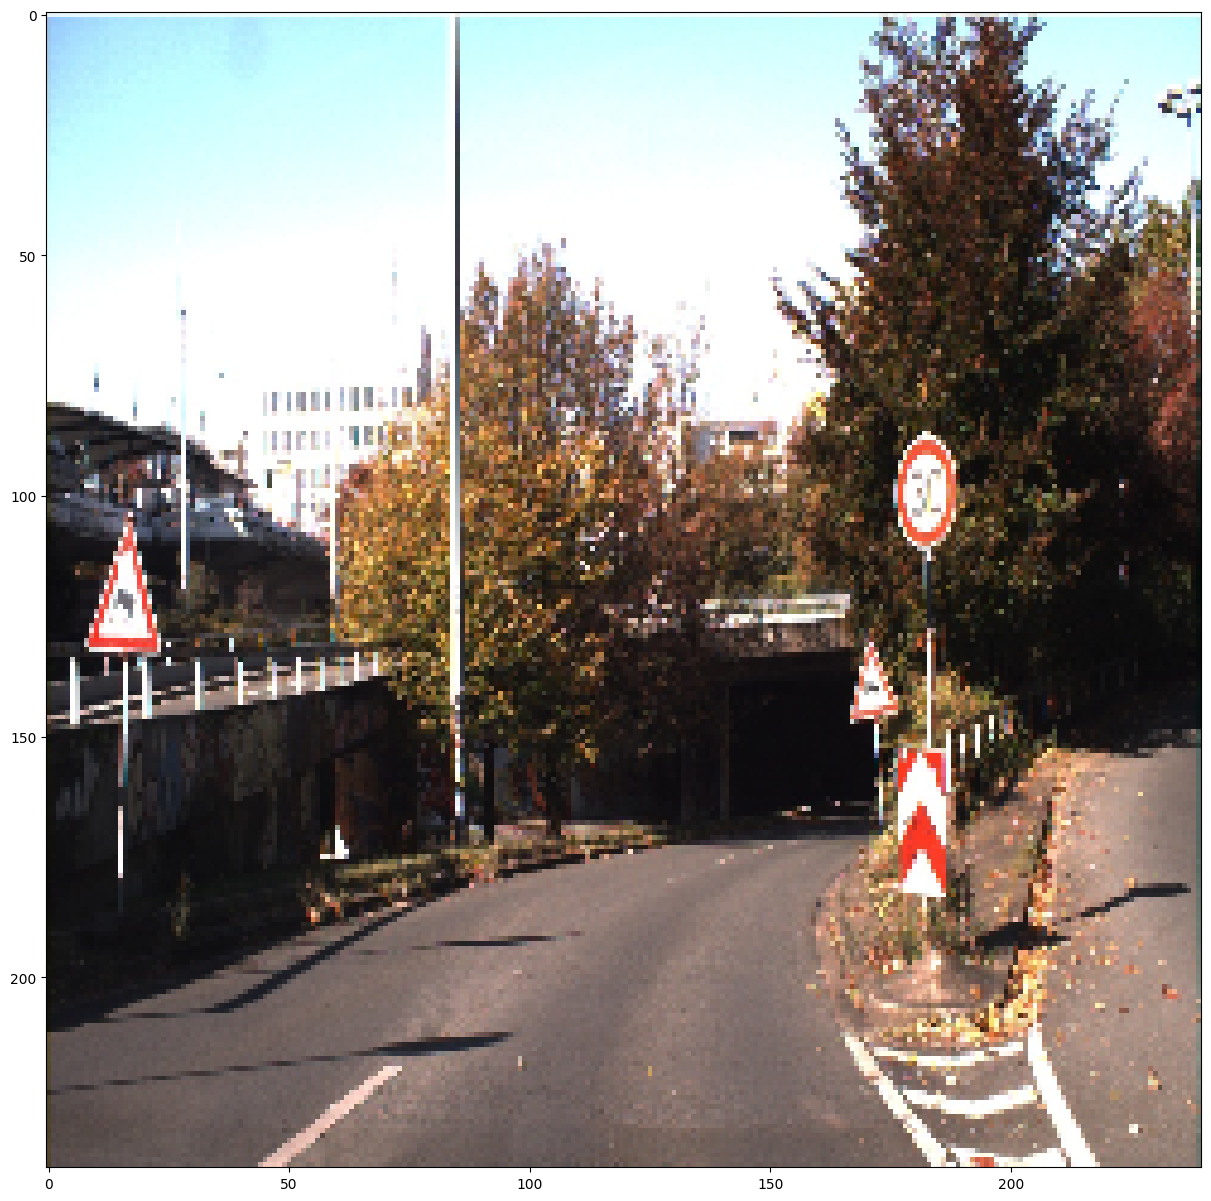

In [11]:
plt.figure(figsize=(15,15))
plt.imshow(image_list[8])
plt.show()

In [12]:
train_data = np.reshape(image_list, (len(image_list), -1))

In [13]:
train_data

array([[221, 220, 206, ...,  29,  51,  38],
       [255, 255, 255, ...,   8,  16,  14],
       [255, 255, 255, ...,  18,  30,  26],
       ...,
       [241, 254, 254, ...,  11,  22,  18],
       [255, 255, 255, ...,  17,  32,  32],
       [218, 218, 206, ...,  33,  66,  66]], dtype=uint8)